# <font color=blue>Método de Clusterização BIRCH para Grandes Bases de Dados</font>

## <font color=blue>Laion Lima Boaventura e Anderson Ara</font> 

### <font color=blue>03 de Dezembro de 2019</font> 


### <font color=lightblue|>1.</font> Escopo


Os métodos de agrupamento de dados existentes não tratam adequadamente o problema de processar grandes conjuntos de dados com uma quantidade limitada de recursos (isto é, ciclos de memória e CPU). Com isso, à medida que o tamanho do conjunto de dados aumenta, eles são reduzidos em termos de tempo de execução e qualidade dos resultados. Em alto nível, o BIRCH, do inglês **_Balanced Iterative Reducing and Clustering using Hierarchies_**, lida com grandes conjuntos de dados, gerando primeiro um resumo mais compacto que retém o máximo possível de informações de distribuição para, posteriormente, agrupar esse resumo de dados em vez do conjunto de dados original. 
Pode-se dizer ainda que o BIRCH complementa outros algoritmos de clustering. Isto porque diferentes algoritmos de clustering podem ser aplicados ao resumo produzido pelo BIRCH. Contudo, o BIRCH pode lidar apenas com atributos métricos (semelhante ao tipo de recursos que o KMEANS pode manipular), ou seja, somente com atributos cujos valores podem ser representados por coordenadas explícitas em um espaço euclidiano (sem variáveis categóricas).



### <font color=lightblue|>2.</font> O Algoritmo


O BIRCH tenta minimizar os requisitos de memória de grandes conjuntos de dados resumindo as informações contidas nas regiões densas como entradas do Recurso de Cluster (CF). Para isso, o BIRCH requer três parâmetros: o fator de ramificação *Br*, o limite *T* e a contagem de clusters *k*. Enquanto os pontos de dados são inseridos no BIRCH, uma árvore com altura equilibrada, o *cluster features tree*, ou CF, de clusters hierárquicos é construída. Em que, cada nó representa um cluster na hierarquia do cluster, os nós intermediários são superaglomerados e os nós folha são os clusters reais. O fator de ramificação *Br* é o número máximo de filhos que um nó pode ter. Este é um parâmetro global. Cada nó contém as informações mais importantes do cluster pertencente, os Recurso de Cluster (CF). Desses, os centros de cluster $C_i = 1/n_i\sum_j^nx_{ij}$, onde $x_{ij}$ são os elementos do *i- ésimo* cluster e os raios do cluster $R_i= \sqrt{1/n_i\sum_j^n(x_{ij}-C_i)^2}$ pode ser calculado para cada cluster. Cada novo ponto começa na raiz e caminha recursivamente pela árvore, sempre entrando no subcluster com o centro mais próximo até que a caminhada termine em um determinado nó da folha. Uma vez chegou a uma folha, o novo ponto é adicionado a este conjunto de folha, desde que não se aumentar o raio do cluster para além do limiar *T* . Caso contrário, um novo cluster é criado com o novo ponto como seu único membro. Dessa forma, o parâmetro *T* controla o tamanho dos clusters. Se a criação de um novo cluster levar a mais de *Br* nós secundários do pai, o pai será dividido. Para garantir que a árvore permaneça equilibrada, os nós mais distantes podem precisar ser divididos recursivamente. Uma vez que todos os pontos são submetidos ao BIRCH, os centros dos aglomerados de folhas são, na fase de agrupamento global , inseridos em um algoritmo de agrupamento , como *agglomerative clustering* ou k-means, que é dado como parâmetro a contagem de *k* agrupamentos. Esta última etapa melhora a qualidade do cluster mesclando os clusters vizinhos. Basicamente o CF Tree é uma representação muito compacta do conjunto de dados em que cada entrada em um nó folha não é um único ponto de dados, mas sim um subcluster. Cada nó não-folha contém no máximo *Br* entradas. Nesse contexto, uma única entrada contém um ponteiro para um nó filho e um CF composto pela soma dos CFs no filho (subclusters de subclusters). Por outro lado, um nó folha contém no máximo *k* entradas e cada entrada é um CF (subclusters de pontos de dados). Todas as entradas em um nó folha devem atender a um requisito de limite. Ou seja, o diâmetro de cada entrada de folha deve ser menor que o *T* . Além disso, todo nó folha possui dois ponteiros, *prev* e *next*, que são usados para encadear todos os nós das folhas para varreduras eficientes. **Se ficou um pouco abstrato não se preocupe, vamos tornar um pouco mais claro o algoritmo e apresentá-lo passo a passo**:

#### <font color=lightblue|>2.1</font> Etapa I:

O algoritmo começa com um valor limite inicial, varre os dados e insere pontos na árvore. Se ficar sem memória antes de concluir a varredura dos dados, aumentará o valor do limite e reconstruirá uma nova árvore CF menor, reinserindo as entradas de folha da antiga árvore CF na nova árvore CF. Depois que todas as entradas anteriores foram reinseridas, a varredura dos dados e a inserção na nova árvore CF são retomadas a partir do ponto em que foram interrompidas.
Uma boa escolha do valor limite pode reduzir bastante o número de reconstruções. No entanto, se o limite inicial for muito alto, obteremos uma árvore CF menos detalhada do que é possível com a memória disponível.


Opcionalmente, podemos alocar uma quantidade fixa de espaço em disco para lidar com outliers. Os valores discrepantes são entradas em folha de baixa densidade que são consideradas sem importância em relação ao padrão geral de agrupamento. Quando reconstruímos a árvore CF, reinserindo as entradas de folha antigas, o tamanho da nova árvore CF é reduzido de duas maneiras. Primeiro, aumentamos o valor limite, permitindo que cada entrada de folha absorva mais pontos. Segundo, tratamos algumas entradas de folha como possíveis discrepantes e as gravamos em disco. Uma entrada de folha antiga é considerada um potencial discrepante se tiver muito menos pontos de dados que a média. Um aumento no valor limite ou uma alteração na distribuição em resposta aos novos dados pode muito bem significar que o potencial discrepante não se qualifica mais como discrepante.

#### <font color=lightblue|>2.2</font> Etapa II:

Dado que determinados algoritmos de cluster têm melhor desempenho quando o número de objetos está dentro de um determinado intervalo, podemos agrupar sub-aglomerados aglomerados em grupos maiores, resultando em uma árvore CF geral menor.

#### <font color=lightblue|>2.3</font> Etapa III:

Quase qualquer algoritmo de cluster pode ser adaptado para categorizar os recursos de cluster, em vez de pontos de dados. Por exemplo, como menciou anteriormente, poderíamos usar o k-means para categorizar nossos dados, sempre obtendo os benefícios do BIRCH.


#### <font color=lightblue|>2.4</font> Etapa IV:

Ainda que a árvore possa ter sido reconstruída várias vezes, os dados originais foram digitalizados apenas uma vez. Assim, esta etapa envolve passagens adicionais sobre os dados para corrigir imprecisões causadas pelo fato de o algoritmo de clustering ser aplicado a um resumo aproximado dos dados. Desta forma, podemos também descartar valores discrepantes.



### <font color=lightblue|>3.</font> Comparando o  BIRCH com o Agglomerative Clustering:

A escolha de compará-lo ao Agglomerative Clustering se deu pelo fato desse algoritmo ser comumente utilizado para situações de grande volume de dados. Isto porque, o Agglomerative Clustering usa uma abordagem de baixo para cima, em que cada ponto de dados inicia em seu próprio cluster. Esses clusters são então unidos com avidez, reunindo os dois clusters mais semelhantes e os mesclando. Essa abordagem depende da construção de uma matriz de similaridade entre todos os pontos de dados, que geralmente é calculada pela distância do cosseno ou Jaccard.

#### <font color=lightblue|>3.1</font> Importando os pacotes necessários:

In [1]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt

#### <font color=lightblue|>3.2</font> Preparando dados:

Primeiro, criamos dados de cluster em uma base de dados elativamente grande, porém simples, para este tutorial.

In [2]:
np.random.seed(1)
p1 = np.random.randint(1,30,1100) 
p2 = np.random.randint(15,40,1200)
p3 = np.random.randint(25,60,900)

data = np.array(np.concatenate([p1, p2, p3]))
x_range = range(len(data))
x = np.array(list(zip(x_range, data))).reshape(len(x_range), 2)

Podemos visualizá-lo pelo plot a seguir:

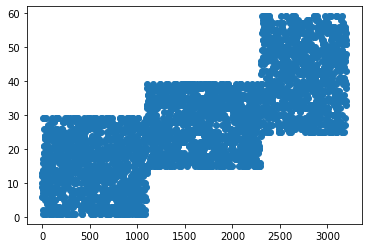

In [3]:
plt.scatter(x[:,0], x[:,1])
plt.show()

#### <font color=lightblue|>3.3</font> Clusterizando os dados com o BIRCH

Nesta etapa, definifimos o método Birch e o ajustaremos com x dados. Definimos _branching_factor_ (**Br**) e parâmetros de limite (**T**). O branching_factor define o número de sub-clusters e o limite define o limite entre a amostra e o sub-cluster.


In [4]:
bclust=Birch(branching_factor=100, threshold=.5).fit(x)
print(bclust)
Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,threshold=0.5)

Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)


Birch(branching_factor=100, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

O método identifica o número de clusters para mapear. Também pode ser definido manualmente.
Agora, podemos prever x dados para obter o ID dos clusters de destino.



In [5]:
labels = bclust.predict(x)

Por fim, verificaremos os pontos agrupados em um gráfico, separando-os com cores diferentes.


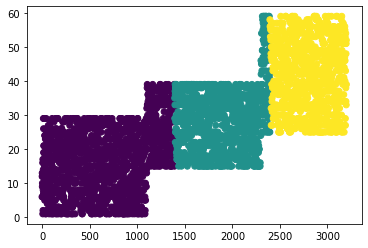

In [6]:
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

#### <font color=lightblue|>3.4</font> Clusterizando os dados com o Agglomerative Clustering

In [7]:
 from sklearn.cluster import AgglomerativeClustering

Agglomerative = AgglomerativeClustering(n_clusters=3)
Agglomerative.fit(x)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [8]:

labels_Agglomerative = Agglomerative.fit_predict(x)

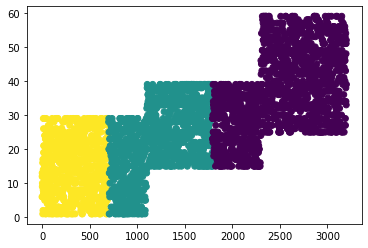

In [9]:
plt.scatter(x[:,0], x[:,1], c=labels_Agglomerative)
plt.show()

### <font color=lightblue|>4.</font> Conclusão

 **De fato, o BIRCH é uma alternativa útil ao Agglomerative Clustering para situações de grande volume de dados.**